# Librerias basicas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

Importar el archivo

In [2]:
path = "weatherAUS.csv"
dataframe = pd.read_csv(path, usecols=range(1,25))
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


25 Columnas

**Date** fecha de la observacion

**MinTemp** Temperatura minima. En grados celsius

**MaxTemp** Temperatura maxima. En grados celsius

**Rainfall** cantidad de lluvia registrada en el dia. En mm

**Evaporation** evaporacion (mm) de 00 a 09am.

**Sunshine** Numero de horas de luz solar durante el dia.

**WindGustDir** direccion de la rafaga de viento mas fuerte en las 24 horas

**WindGustSpeed** velocidad de la rafaga de viento mas fuerte en km/h

**WindDir9am** direccion del viento a las 9 am

**WindDir3pm** direccion del viento a las 3 pm

**WindSpeed9am** velocidad del viento en km/h, a las 9 am

**WindSpeed3pm** velocidad del viento en km/h, a las 3 pm

**Humidity9am** humedad en porcentaje a las 9 am

**Humidity3pm** humedad en porcentaje a las 3 pm

**Pressure9am** presion atmosferica en (hpa) al nivel del mar a las 9 am

**Pressure9am** presion atmosferica en (hpa) al nivel del mar a las 3 pm

**Cloud9am** Fraccion del cielo oscurecida por nubes medida en fracciones de 8 (0 indica sin nubes, 8 totalmente nublado) a las 9 am

**Cloud9am** Fraccion del cielo oscurecida por nubes medida en fracciones de 8 (0 indica sin nubes, 8 totalmente nublado) a las 3pm

**Temp9am** temperatura en grados celsius a las 9 am

**Temp3pm** temperatura en grados celsius a las 3 pm

**RainToday** valor booleano si llovio o no durante el dia (1 si pasa 1 mm)

**RainTomorrow** Cantidad de lluvia al dia siguiente en mm

**RainfallTomorrow** cantidad de lluvia al dia siguiente en mm

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              145412 non-null  object 
 1   Location          145412 non-null  object 
 2   MinTemp           143928 non-null  float64
 3   MaxTemp           144159 non-null  float64
 4   Rainfall          142152 non-null  float64
 5   Evaporation       82658 non-null   float64
 6   Sunshine          75616 non-null   float64
 7   WindGustDir       135096 non-null  object 
 8   WindGustSpeed     135159 non-null  float64
 9   WindDir9am        134850 non-null  object 
 10  WindDir3pm        141186 non-null  object 
 11  WindSpeed9am      143645 non-null  float64
 12  WindSpeed3pm      142351 non-null  float64
 13  Humidity9am       142759 non-null  float64
 14  Humidity3pm       140907 non-null  float64
 15  Pressure9am       130351 non-null  float64
 16  Pressure3pm       13

Seleccionar las lucalizaciones Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport.
descartar el resto

In [4]:
dataframe['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
costa_este = ["Adelaide", "Canberra", "Cobar", "Dartmoor", "Melbourne", "MelbourneAirport", "MountGambier", "Sydney", "SydneyAirport"]

dataframe.loc[dataframe['Location'].isin(costa_este), 'Location'] = 'costa_este'

dataframe = dataframe[dataframe['Location'] == 'costa_este']

dataframe = dataframe.reset_index(drop=True)

In [6]:
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2009-01-01,costa_este,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
1,2009-01-02,costa_este,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
2,2009-01-03,costa_este,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
3,2009-01-04,costa_este,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
4,2009-01-05,costa_este,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0


Como se pueden considerar todas las localizaciones como una descarto la columna de las localizaciones tanto la de las fechas que tampoco voy a usar

In [7]:
dataframe = dataframe.drop('Location', axis=1)
dataframe = dataframe.drop('Date', axis=1)

# Codear Las columnas que tienen el tipo object, que son todas de direccion de viento y raintoday,
raintomorrow se deja para la parte de clasificacion

In [8]:
coord = {
    'N': 0, 'E': 90, 'S': 180, 'W': 270,
    'WNW': 292.5, 'WSW': 247.5, 'NE': 45,
    'NNW': 337.5, 'NNE': 22.5, 'SW': 225,
    'ENE': 67.5, 'SSE': 157.5, 'NW': 315,
    'SE': 135, 'ESE': 112.5, 'SSW': 202.5
}

dataframe['WindGustDir'] = dataframe['WindGustDir'].map(coord)
dataframe['WindDir9am'] = dataframe['WindDir9am'].map(coord)
dataframe['WindDir3pm'] = dataframe['WindDir3pm'].map(coord)

In [9]:
dataframe['RainToday'].replace({'Yes':1, 'No': 0}, inplace=True)

In [10]:
dataframe.isnull().sum()

MinTemp              570
MaxTemp              558
Rainfall             986
Evaporation         4353
Sunshine            6713
WindGustDir         1645
WindGustSpeed       1642
WindDir9am          1648
WindDir3pm           437
WindSpeed9am         358
WindSpeed3pm         340
Humidity9am          940
Humidity3pm          890
Pressure9am          839
Pressure3pm          829
Cloud9am            9367
Cloud3pm            9550
Temp9am              585
Temp3pm              576
RainToday            986
RainTomorrow         985
RainfallTomorrow     985
dtype: int64

# Hacer split de los datos

In [11]:
x_reg = dataframe.drop(columns=['RainTomorrow','RainfallTomorrow'])
y_reg = dataframe['RainfallTomorrow']

x_clas = x_reg
y_clas = dataframe['RainTomorrow']

In [12]:
from sklearn.model_selection import train_test_split

### Regresion

In [13]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg,y_reg, test_size=0.25, random_state=42)

In [14]:
dataframe_regresion = pd.concat([x_train_reg, y_train_reg], axis=1)
dataframe_test_regresion = pd.concat([x_test_reg, y_test_reg], axis=1)


In [15]:
dataframe_regresion = dataframe_regresion.reset_index(drop=True)
dataframe_test_regresion = dataframe_test_regresion.reset_index(drop=True)
dataframe_regresion.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainfallTomorrow
0,11.0,19.3,0.0,3.6,9.1,202.5,41.0,180.0,112.5,19.0,...,76.0,62.0,1024.3,1022.9,3.0,5.0,16.3,18.7,0.0,0.0
1,7.6,22.3,0.0,NaN,NaN,292.5,46.0,315.0,292.5,17.0,...,60.0,47.0,1015.7,1014.9,NaN,6.0,13.5,20.2,0.0,0.0
2,0.0,13.1,0.0,1.4,8.3,0.0,24.0,0.0,337.5,15.0,...,75.0,43.0,1034.1,1031.6,0.0,5.0,3.9,12.6,0.0,0.0
3,13.5,23.4,0.0,25.6,NaN,157.5,44.0,180.0,135.0,11.0,...,47.0,41.0,1018.6,1016.4,NaN,NaN,17.3,21.9,0.0,0.0
4,9.3,16.4,2.0,4.4,5.6,337.5,24.0,337.5,202.5,13.0,...,68.0,53.0,991.8,993.1,7.0,6.0,11.9,15.6,1.0,1.6


### clasificacion

In [16]:
x_train_clas, x_test_clas, y_train_clas, y_test_clas = train_test_split(x_clas,y_clas, test_size=0.25, random_state=86)

In [17]:
dataframe_clasifacion = pd.concat([x_train_clas, y_train_clas], axis=1)
dataframe_test_clasificacion = pd.concat([x_test_clas, y_test_clas], axis=1)

In [18]:
dataframe_clasifacion = dataframe_clasifacion.reset_index(drop=True)
dataframe_test_clasificacion = dataframe_test_clasificacion.reset_index(drop=True)
dataframe_clasifacion.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.4,18.1,0.0,1.4,7.4,0.0,37.0,292.5,0.0,6.0,...,83.0,45.0,1029.6,1026.9,7.0,7.0,9.8,17.2,0.0,No
1,3.7,21.4,0.0,0.6,12.7,337.5,41.0,22.5,0.0,20.0,...,79.0,49.0,1026.2,1021.9,1.0,1.0,12.4,20.3,0.0,No
2,10.7,16.4,0.0,1.2,4.7,157.5,19.0,337.5,157.5,4.0,...,91.0,55.0,1020.7,1018.2,7.0,7.0,11.7,16.0,0.0,No
3,13.4,19.1,0.0,1.4,0.7,292.5,26.0,315.0,NaN,11.0,...,69.0,70.0,1034.6,1031.5,7.0,6.0,14.8,16.8,0.0,No
4,16.5,24.1,0.0,9.0,3.9,247.5,61.0,315.0,270.0,24.0,...,60.0,93.0,1006.5,1003.9,7.0,8.0,18.2,15.9,0.0,Yes


# completar datos faltantes

In [19]:
dataframe_regresion.isnull().sum()


MinTemp              422
MaxTemp              411
Rainfall             736
Evaporation         3247
Sunshine            5032
WindGustDir         1224
WindGustSpeed       1221
WindDir9am          1212
WindDir3pm           322
WindSpeed9am         266
WindSpeed3pm         252
Humidity9am          691
Humidity3pm          653
Pressure9am          629
Pressure3pm          618
Cloud9am            7020
Cloud3pm            7149
Temp9am              434
Temp3pm              426
RainToday            736
RainfallTomorrow     732
dtype: int64

Dropear los que tengan una cantidad de datos faltantes menor al 5% de los datos

In [20]:
valores_faltantes = dataframe_regresion.isnull().sum()
valores_totales = 21174
for valor in valores_faltantes:
    print(valor/valores_totales)

0.01993010295645603
0.019410597903088692
0.0347596108434873
0.15334844620761312
0.23764994804949466
0.05780674412014735
0.05766506092377444
0.05724001133465571
0.015207329744025692
0.012562576745064702
0.011901388495324454
0.03263436289789364
0.030839709077170114
0.029706243506186832
0.029186738452819494
0.3315386795126098
0.3376310569566449
0.02049683574194767
0.020119013884953244
0.0347596108434873
0.03457069991499008


In [21]:
dataframe_regresion.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RainfallTomorrow'], inplace=True)
dataframe_test_regresion.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RainfallTomorrow'], inplace=True)

In [22]:
dataframe_regresion.isnull().sum()

MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation         3047
Sunshine            4636
WindGustDir          919
WindGustSpeed        917
WindDir9am           828
WindDir3pm             0
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Cloud9am            5853
Cloud3pm            5959
Temp9am                0
Temp3pm                0
RainToday              0
RainfallTomorrow       0
dtype: int64

# Evaporacion

duda entre reemplazar por la media o reemplazar por 0

In [23]:
dataframe_regresion['Evaporation'].describe()

count    16571.000000
mean         4.828025
std          3.589103
min          0.000000
25%          2.200000
50%          4.000000
75%          6.600000
max         64.800000
Name: Evaporation, dtype: float64

<Axes: >

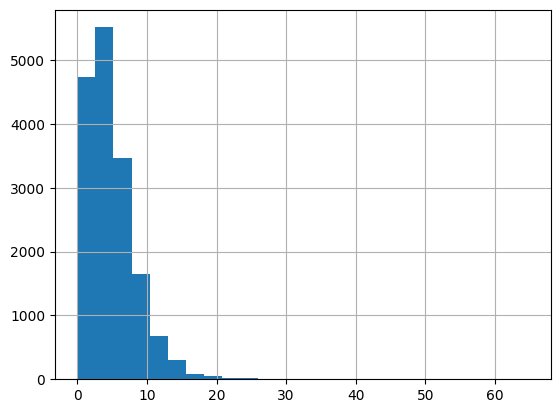

In [24]:
dataframe_regresion['Evaporation'].hist(bins=25)

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer_evaporation = SimpleImputer(strategy='mean', fill_value=0)
columna_evaporacion = imputer_evaporation.fit_transform(dataframe_regresion[['Evaporation']])
dataframe_regresion['Evaporation'] = columna_evaporacion


<Axes: >

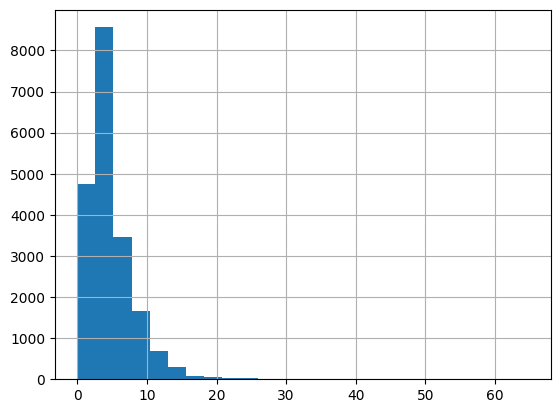

In [27]:
dataframe_regresion['Evaporation'].hist(bins=25)

<Axes: >

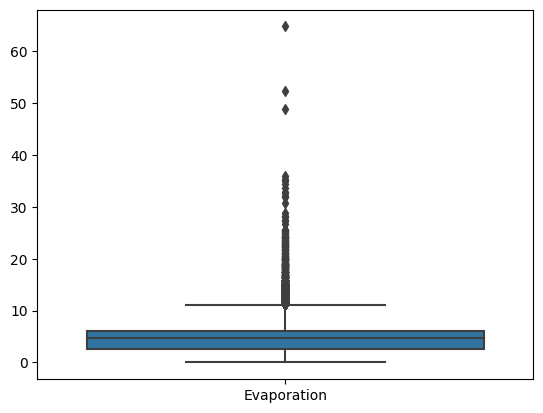

In [28]:
sns.boxplot(dataframe_regresion[['Evaporation']])

# Sunshine

In [29]:
dataframe_regresion['Sunshine'].describe()

count    14982.000000
mean         6.951121
std          3.862799
min          0.000000
25%          3.900000
50%          7.500000
75%         10.100000
max         14.300000
Name: Sunshine, dtype: float64

In [30]:
#from sklearn.impute import KNNImputer

<Axes: >

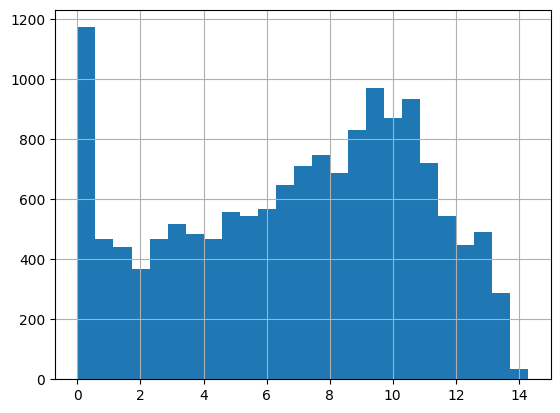

In [31]:
dataframe_regresion['Sunshine'].hist(bins=25)

In [32]:
imputer_sunshine = SimpleImputer(strategy='median')
columna_sunshine = imputer_sunshine.fit_transform(dataframe_regresion[['Sunshine']])
dataframe_regresion['Sunshine'] = columna_evaporacion


<Axes: >

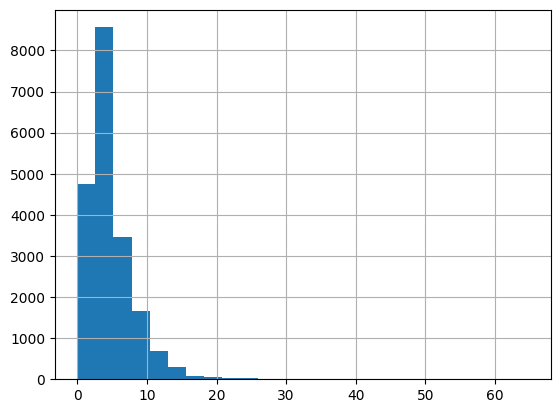

In [33]:
dataframe_regresion['Sunshine'].hist(bins=25)

# WindGustSpeed

<Axes: >

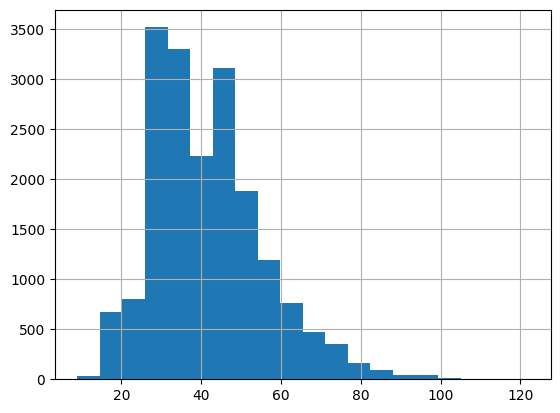

In [34]:
dataframe_regresion['WindGustSpeed'].hist(bins=20)

In [35]:
imputer_WindGustSpeed = SimpleImputer(strategy='mean')
columna_WindGustSpeed = imputer_WindGustSpeed.fit_transform(dataframe_regresion[['WindGustSpeed']])
dataframe_regresion['WindGustSpeed'] = columna_WindGustSpeed

<Axes: >

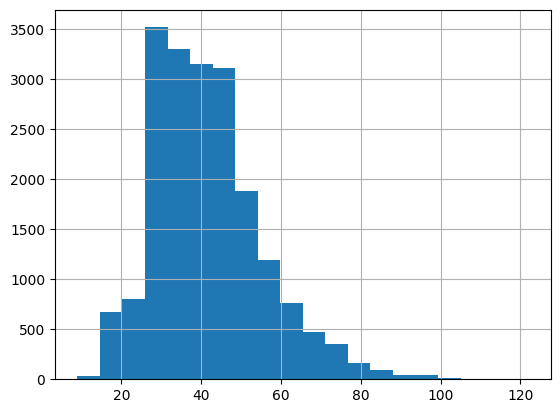

In [36]:
dataframe_regresion['WindGustSpeed'].hist(bins=20)

# Clouds

<Axes: >

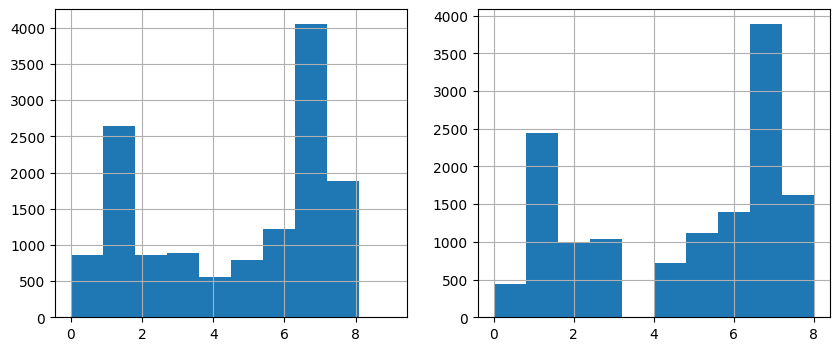

In [37]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['Cloud9am'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['Cloud3pm'].hist(bins=10)

In [38]:
imputer_clouds = SimpleImputer(strategy='median')

columna_cloud9am = imputer_clouds.fit_transform(dataframe_regresion[['Cloud9am']])
columna_cloud3pm = imputer_clouds.fit_transform(dataframe_regresion[['Cloud3pm']])

dataframe_regresion['Cloud9am'] = columna_cloud9am
dataframe_regresion['Cloud3pm'] = columna_cloud3pm

<Axes: >

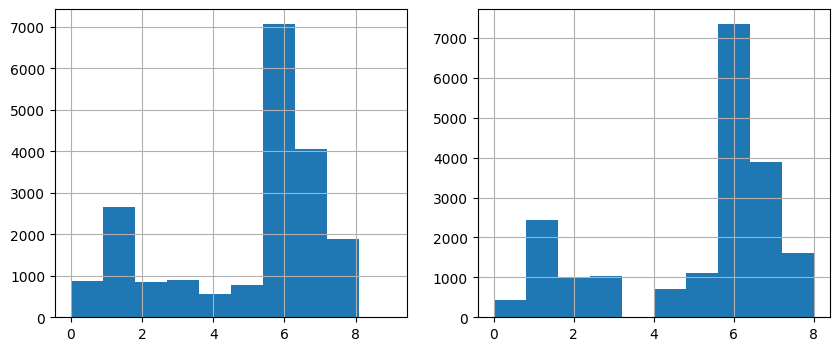

In [39]:
plt.figure(figsize=(10,4))

plt.subplot(121)
dataframe_regresion['Cloud9am'].hist(bins=10)
plt.subplot(122)
dataframe_regresion['Cloud3pm'].hist(bins=10)

# Wind Dir

In [40]:
dataframe_regresion['WindGustDir'].describe()

count    18699.000000
mean       173.652735
std        105.524723
min          0.000000
25%         90.000000
50%        180.000000
75%        270.000000
max        337.500000
Name: WindGustDir, dtype: float64

In [41]:
dataframe_regresion['WindGustDir'].interpolate(method='linear', inplace=True)
dataframe_regresion['WindDir9am'].interpolate(method='linear', inplace=True)
dataframe_regresion['WindDir3pm'].interpolate(method='linear', inplace=True)

<Axes: >

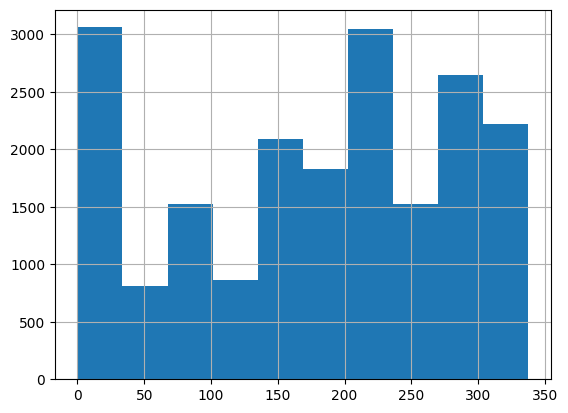

In [42]:
dataframe_regresion['WindGustDir'].hist(bins=10)

# Llenar los datasets de train

In [43]:
dataframe_test_regresion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6522 entries, 0 to 7058
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           6522 non-null   float64
 1   MaxTemp           6522 non-null   float64
 2   Rainfall          6522 non-null   float64
 3   Evaporation       5494 non-null   float64
 4   Sunshine          4966 non-null   float64
 5   WindGustDir       6214 non-null   float64
 6   WindGustSpeed     6214 non-null   float64
 7   WindDir9am        6211 non-null   float64
 8   WindDir3pm        6522 non-null   float64
 9   WindSpeed9am      6522 non-null   float64
 10  WindSpeed3pm      6522 non-null   float64
 11  Humidity9am       6522 non-null   float64
 12  Humidity3pm       6522 non-null   float64
 13  Pressure9am       6522 non-null   float64
 14  Pressure3pm       6522 non-null   float64
 15  Cloud9am          4582 non-null   float64
 16  Cloud3pm          4532 non-null   float64
 17  

In [44]:
media = ['Evaporation','WindGustSpeed']
promedios_regresion = dataframe_regresion[media].mean()

In [45]:
dataframe_test_regresion['Evaporation'] = dataframe_test_regresion['Evaporation'].fillna( dataframe_regresion['Evaporation'].mean())
dataframe_test_regresion['WindGustSpeed']= dataframe_test_regresion['WindGustSpeed'].fillna( dataframe_regresion['WindGustSpeed'].mean())

In [46]:
mediana = ['Cloud9am', 'Cloud3pm']
medianas_regresion = dataframe_regresion[mediana].median()

In [47]:
dataframe_test_regresion['Cloud9am'] = dataframe_test_regresion['Cloud9am'].fillna( dataframe_regresion['Cloud9am'].median())
dataframe_test_regresion['Cloud3pm']= dataframe_test_regresion['Cloud3pm'].fillna( dataframe_regresion['Cloud3pm'].median())
dataframe_test_regresion['Sunshine']= dataframe_test_regresion['Sunshine'].fillna( dataframe_regresion['Sunshine'].median())

In [48]:
dataframe_test_regresion['WindGustDir'].interpolate(method='linear', inplace=True)
dataframe_test_regresion['WindDir9am'].interpolate(method='linear', inplace=True)

In [49]:
dataframe_test_regresion.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainfallTomorrow    0
dtype: int64

In [50]:
dataframe_regresion_X = dataframe_regresion.iloc[:, :-1]
dataframe_regresion_Y = dataframe_regresion.iloc[:,-1]

dataframe_test_regresion_X = dataframe_test_regresion.iloc[:, :-1]
dataframe_test_regresion_Y = dataframe_test_regresion.iloc[:,-1]

# Scatterplot

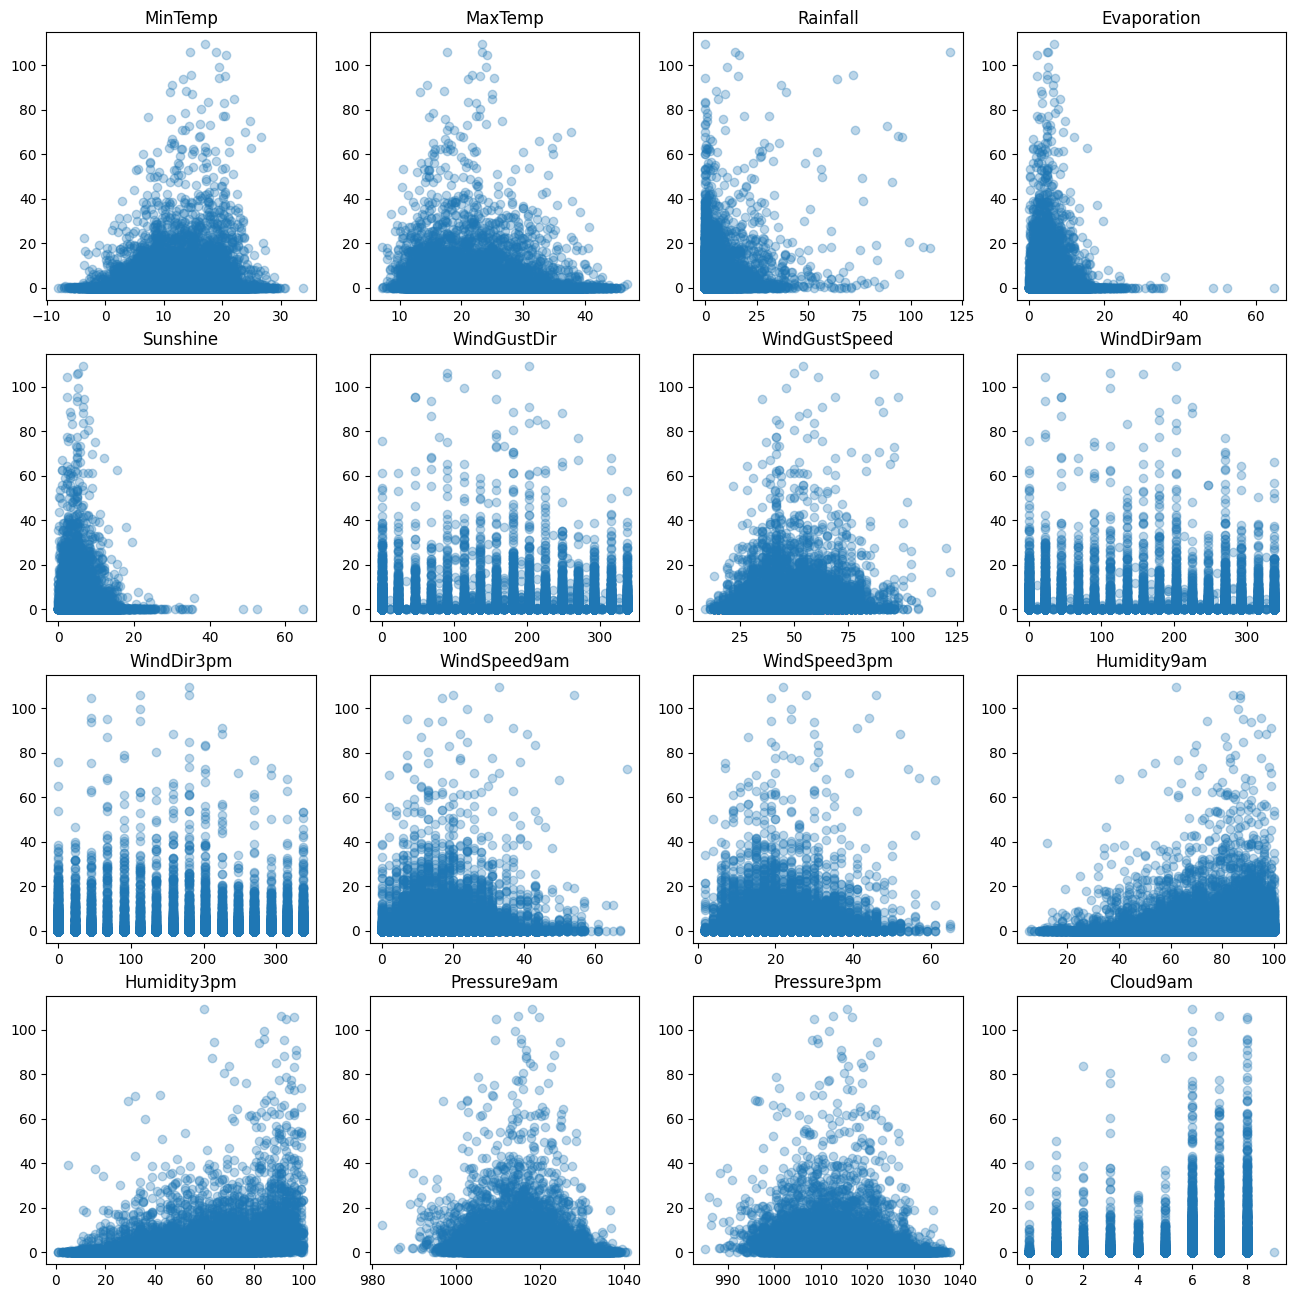

In [51]:
plt.figure(figsize=(16, 16))

for idx, col in enumerate(dataframe_regresion.columns[:16], start=1):  
    plt.subplot(4, 4, idx)
    plt.scatter(data=dataframe_regresion, x=col, y='RainfallTomorrow', alpha=.3)
    plt.title(col)

# Heatmap

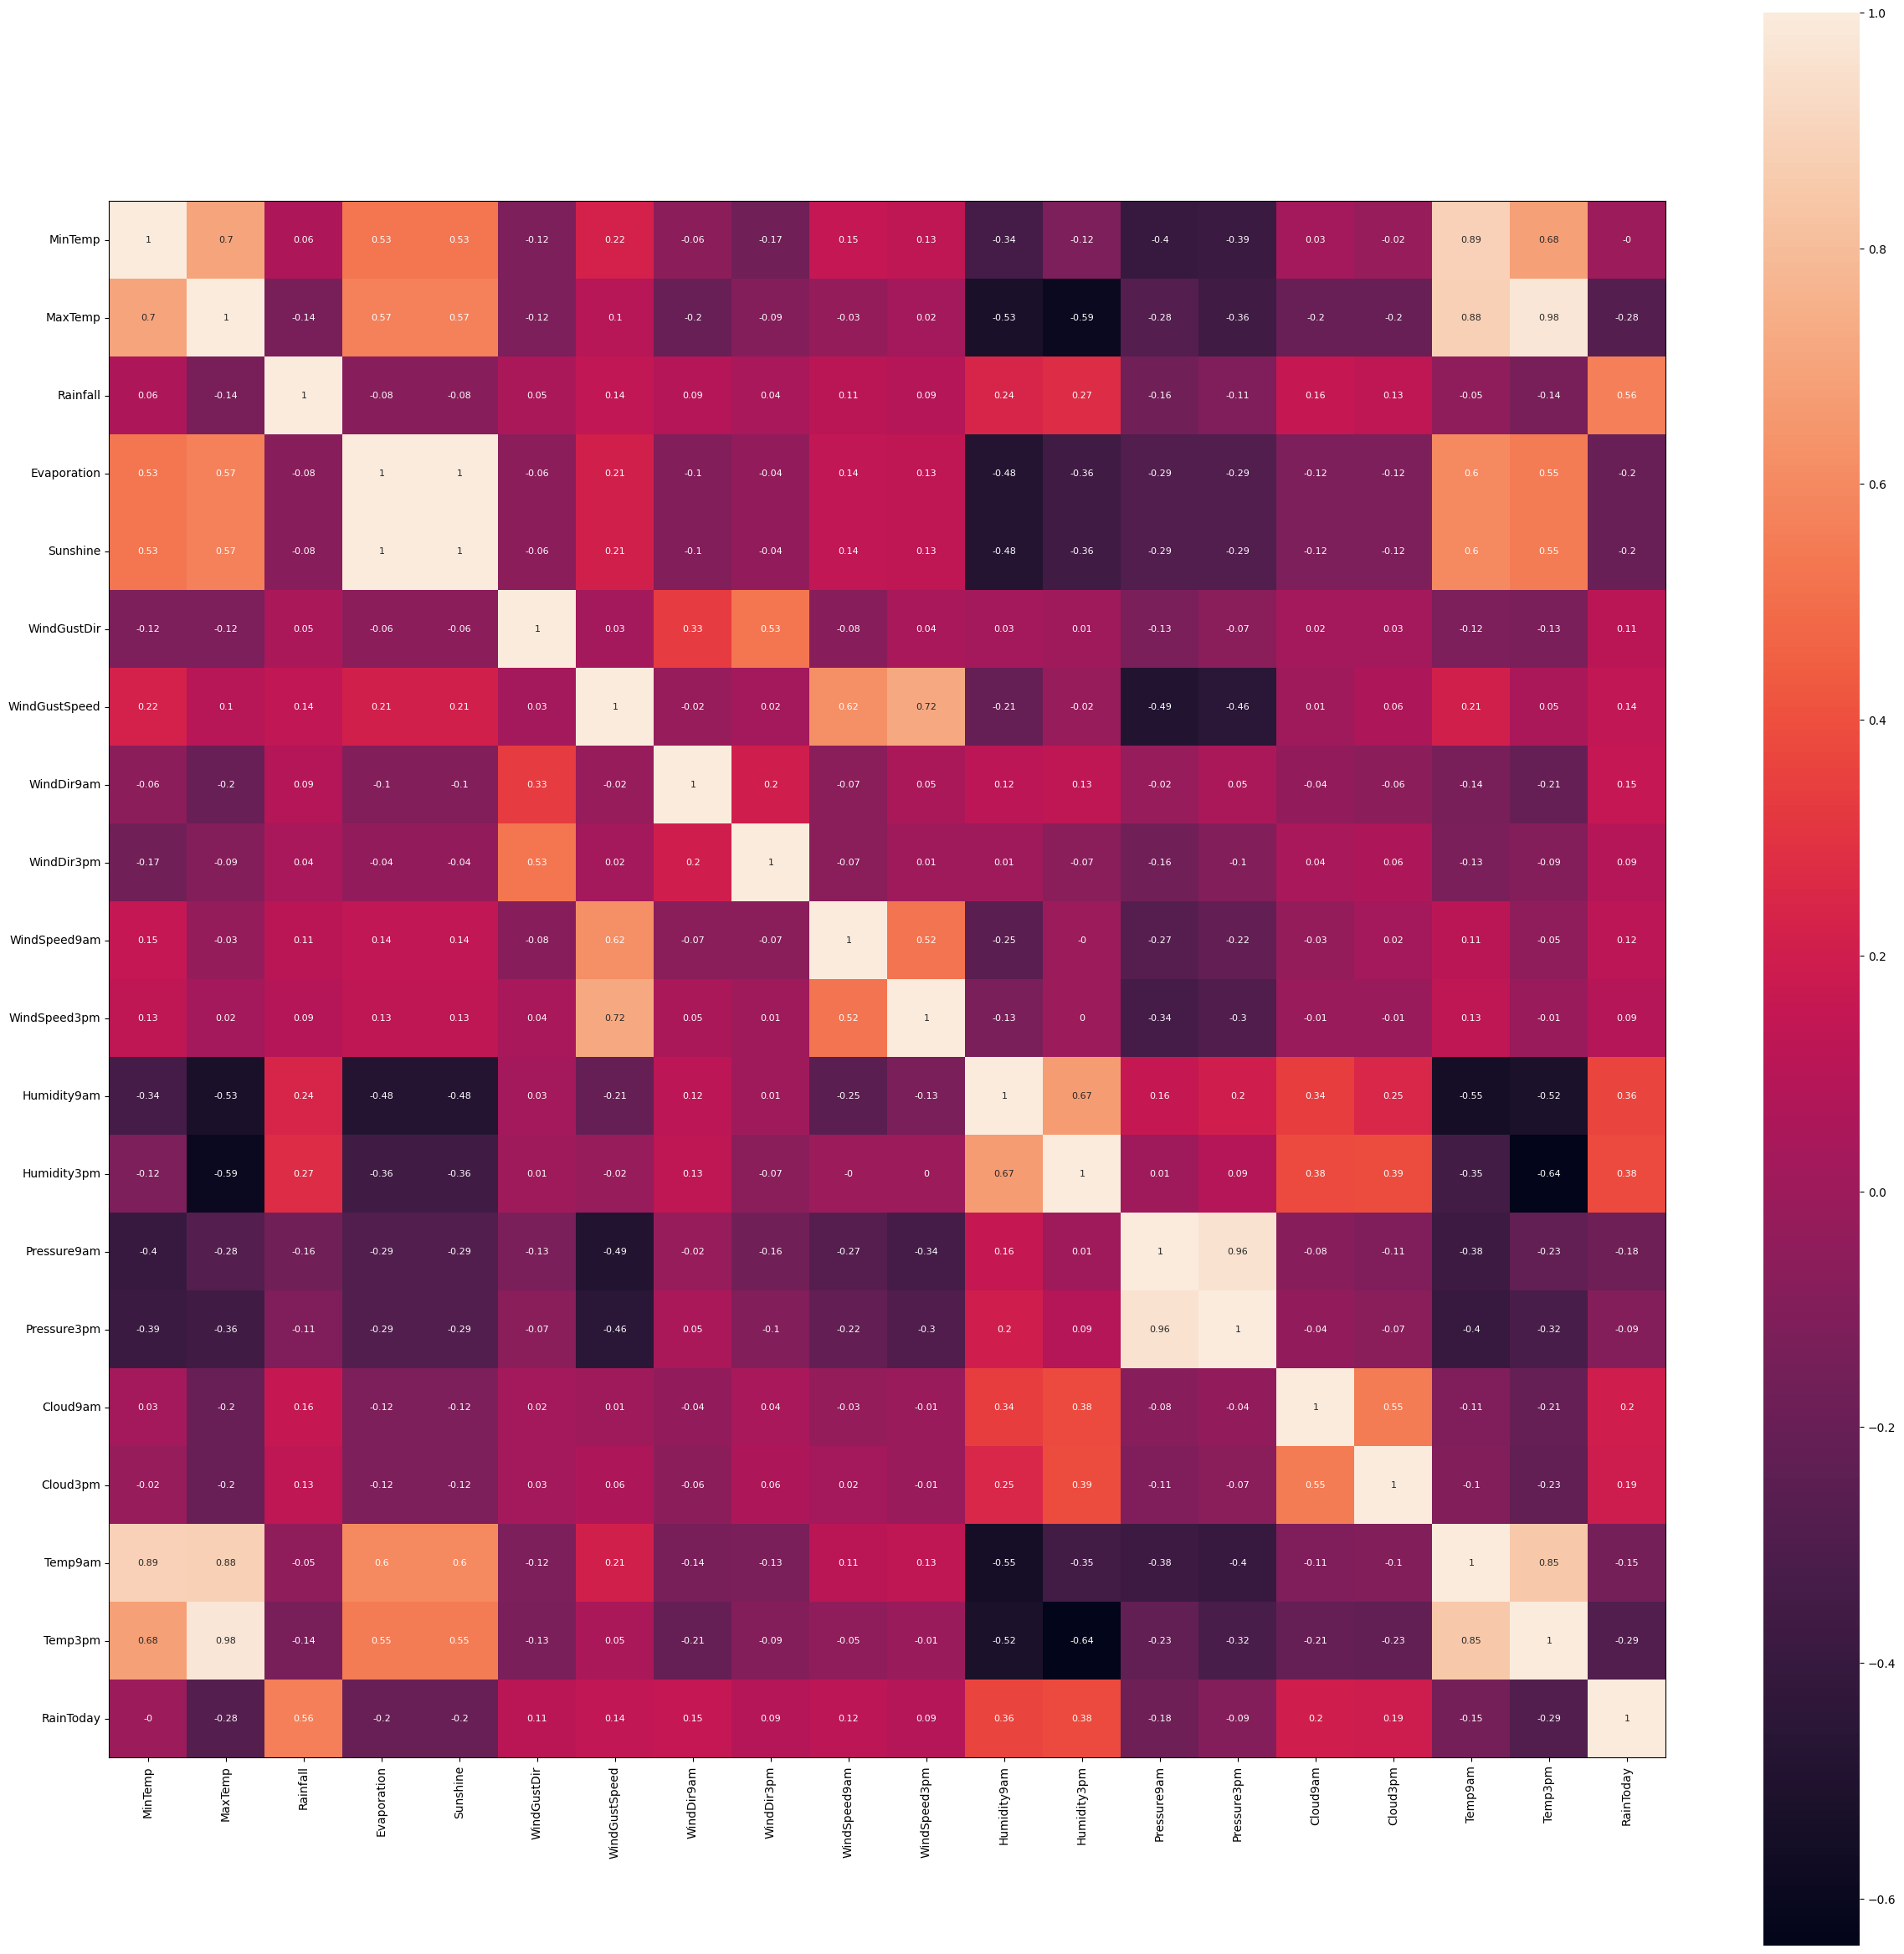

In [52]:
plt.figure(figsize=(30, 30))

heatmap = sns.heatmap(
    dataframe_regresion_X.corr().round(2),
    annot=True,
    square=True,
    annot_kws={'size': 8},  
)

for _, spine in heatmap.spines.items():
    spine.set_visible(True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

# Normalizar

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

dataframe_regresion_X = scaler.fit_transform(dataframe_regresion_X)
dataframe_test_regresion_X = scaler.fit_transform(dataframe_test_regresion_X)


# Regresion Lineal simple

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
regresion = LinearRegression()
regresion.fit(dataframe_regresion_X, dataframe_regresion_Y)

LinearRegression()

# Handler de metricas para regresion

In [57]:
from math import sqrt
def errores(y_test, y_pred):
    print('R2:   %.2f' % r2_score(y_test, y_pred))
    print('MSE:  %.2f' % mean_squared_error(y_test, y_pred))
    print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:  %.2f' % mean_absolute_error(y_test, y_pred))
    print('MAPE: %.2f' % mean_absolute_percentage_error(y_test, y_pred))

In [58]:
y_pred_regresion = regresion.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_regresion)

R2:   0.21
MSE:  28.79
RMSE: 5.37
MAE:  2.69
MAPE: 4606970785716018.00


# Lasso regression

In [59]:
from sklearn.linear_model import LassoCV

In [60]:
lasso = LassoCV()
lasso.fit(dataframe_regresion_X, dataframe_regresion_Y)

LassoCV()

In [61]:
y_pred_lasso = lasso.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_lasso)

R2:   0.21
MSE:  28.74
RMSE: 5.36
MAE:  2.68
MAPE: 4570447808732680.00


# Ridge regression

In [62]:
from sklearn.linear_model import RidgeCV

In [63]:
rid = RidgeCV()
rid.fit(dataframe_regresion_X, dataframe_regresion_Y)

RidgeCV()

In [64]:
y_pred_ridge = rid.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_ridge)

R2:   0.21
MSE:  28.78
RMSE: 5.37
MAE:  2.69
MAPE: 4598161597047062.00


# ElasticNet

In [65]:
from sklearn.linear_model import ElasticNetCV

In [66]:
en = ElasticNetCV()
en.fit(dataframe_regresion_X, dataframe_regresion_Y)

ElasticNetCV()

In [67]:
y_pred_elastic = en.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_elastic)

R2:   0.21
MSE:  28.76
RMSE: 5.36
MAE:  2.68
MAPE: 4561669826103117.00


# Gradiente 

In [68]:
from sklearn.linear_model import SGDRegressor

In [69]:
grad = SGDRegressor(max_iter=1000)
grad.fit(dataframe_regresion_X, dataframe_regresion_Y)


SGDRegressor()

In [70]:
y_pred_grad = en.predict(dataframe_test_regresion_X)

errores(dataframe_test_regresion_Y, y_pred_grad)

R2:   0.21
MSE:  28.76
RMSE: 5.36
MAE:  2.68
MAPE: 4561669826103117.00
